We connect to google drive where the dataset has been stored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import ADASYN

In [54]:
path = "/content/drive/MyDrive/Fraud Dataset/creditcard.csv"
df= pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [56]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [57]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


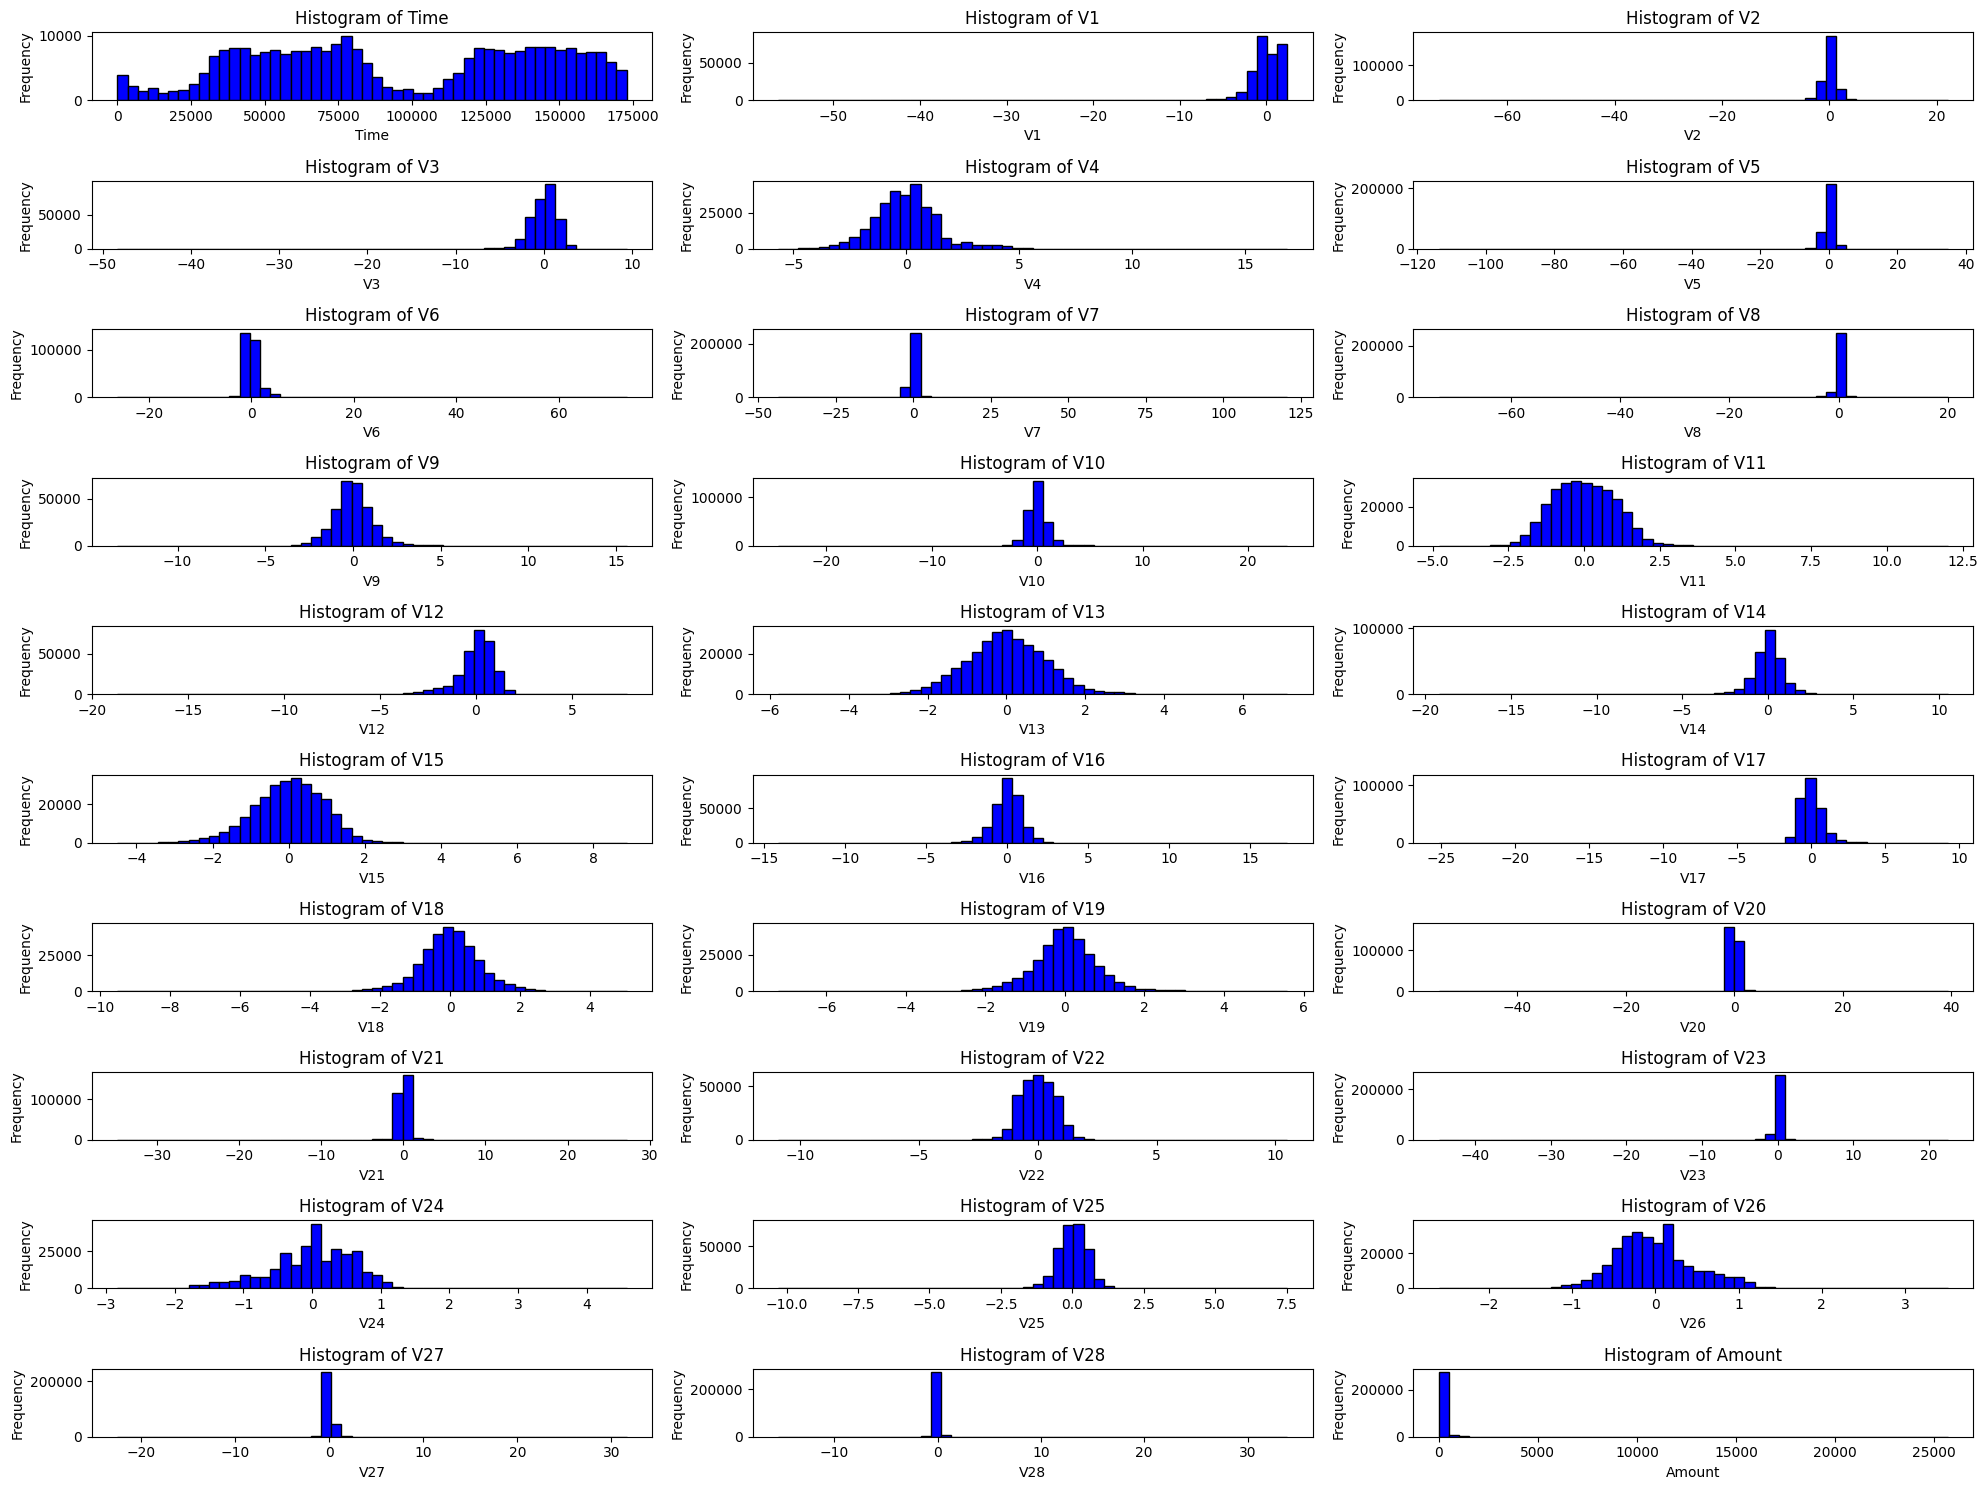

In [58]:
import matplotlib.pyplot as plt

# Columns to plot
columns_to_plot = df.columns[0:30]

# Plotting histograms for multiple columns
plt.figure(figsize=(20, 15))

for i, column_name in enumerate(columns_to_plot, 1):
    plt.subplot(10, 3, i)
    plt.hist(df[column_name], bins=50, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [59]:
y = df['Class']
X = df.drop('Class', axis=1)

In [60]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [61]:
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [62]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-3.065637e-16,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,...,-1.247411e-18,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,2.913952e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.996583e+00,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-8.552120e-01,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,-2.131453e-01,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,9.372174e-01,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.642058e+00,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [84]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [85]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [86]:
# See if both the train and val label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_val))

Label Distributions: 

[0.99827367 0.00172633]
[0.998262 0.001738]


In [87]:
X_train.shape

(170883, 30)

In [88]:
y_train.shape

(170883,)

In [89]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = np.array(X_val).reshape(X_val.shape[0], X_val.shape[1], 1)

input_shape = (X_train.shape[1], 1)

In [80]:
y_train = keras.utils.to_categorical(y_train, 2)
y_val = keras.utils.to_categorical(y_val, 2)
y_test = keras.utils.to_categorical(y_test, 2)

print("Shapes:\nx_train:%s\ny_train:%s\n" % (X_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (X_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(170883, 30, 1)
y_train:(170883, 2, 2)

x_test:(56962, 30, 1)
y_test:(56962, 2)

input_shape:(30, 1)



In [71]:
# Create a Sequential model
model = Sequential()

# Add Conv1D Layer 1
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=input_shape))

# Add BatchNormalization
model.add(BatchNormalization())

# Add MaxPooling1D
model.add(MaxPooling1D(pool_size=2))

# Add Dropout
model.add(Dropout(rate=0.2))

# Add Conv1D Layer 2
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

# Add BatchNormalization
model.add(BatchNormalization())

# Add MaxPooling1D
model.add(MaxPooling1D(pool_size=2))

# Add Dropout
model.add(Dropout(rate=0.5))

# Flatten the output
model.add(Flatten())

# Add Dense Layer 1
model.add(Dense(units=64, activation='relu'))

# Add Dropout
model.add(Dropout(rate=0.5))

# Add Dense Layer 2
model.add(Dense(units=64, activation='relu'))

# Add Output Layer
model.add(Dense(2, activation='softmax'))

In [72]:
# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_2 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 14, 32)            0         
 g1D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 13, 64)            4160      
                                                                 
 batch_normalization_3 (Bat  (None, 13, 64)           

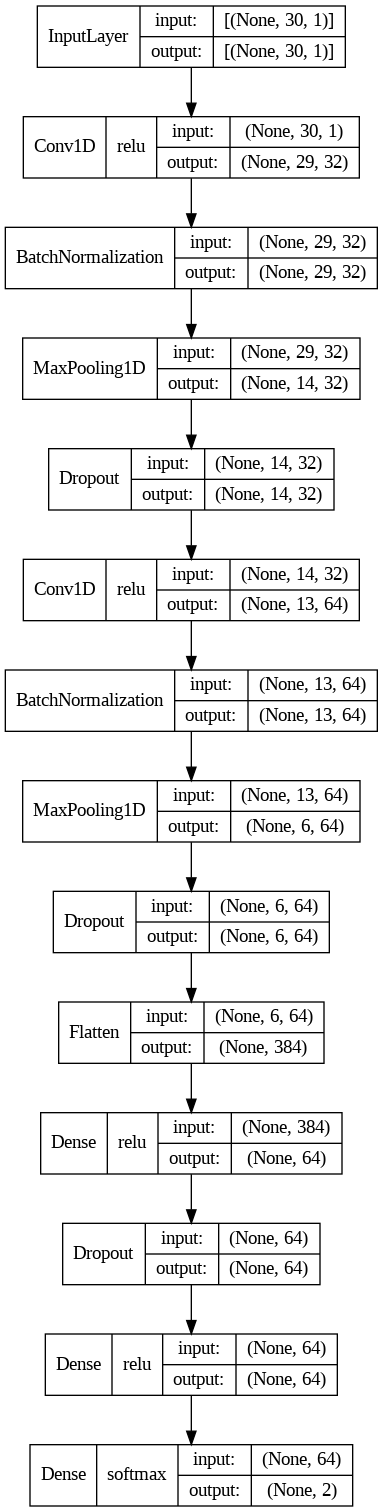

In [73]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False, show_layer_activations=True)

With the help of ModelCheckpoint we save the model with lowest validation loss

In [74]:
from keras.callbacks import ModelCheckpoint

checkpoint_first = ModelCheckpoint('first_model.h5', save_best_only=True, monitor='val_loss', mode='min')

In [75]:
learning_rate = 0.0001
# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
history_first = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, callbacks=[checkpoint_first], verbose=1)

Epoch 1/10
5341/5341 [==============================] - 44s 8ms/step - loss: 0.0440 - accuracy: 0.9908 - val_loss: 0.0116 - val_accuracy: 0.9993
Epoch 2/10
  21/5341 [..............................] - ETA: 28s - loss: 0.0056 - accuracy: 0.9985

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5341/5341 [==============================] - 37s 7ms/step - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.0077 - val_accuracy: 0.9992
Epoch 3/10
5341/5341 [==============================] - 39s 7ms/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0063 - val_accuracy: 0.9993
Epoch 4/10
5341/5341 [==============================] - 38s 7ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0061 - val_accuracy: 0.9992
Epoch 5/10
5341/5341 [==============================] - 38s 7ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0063 - val_accuracy: 0.9993
Epoch 6/10
5341/5341 [==============================] - 37s 7ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0051 - val_accuracy: 0.9993
Epoch 7/10
5341/5341 [==============================] - 36s 7ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0054 - val_accuracy: 0.9992
Epoch 8/10
5341/5341 [==============================] - 39s 7ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0059 - val_accuracy: 0.9

We plot the training and validation loss of the model

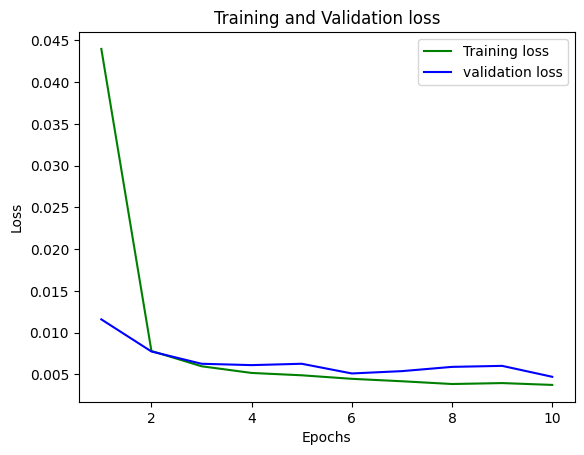

In [77]:
# Plot Training and validation loss
loss_train = history_first.history['loss']
loss_val = history_first.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We plot the training and validation accuracy of the model

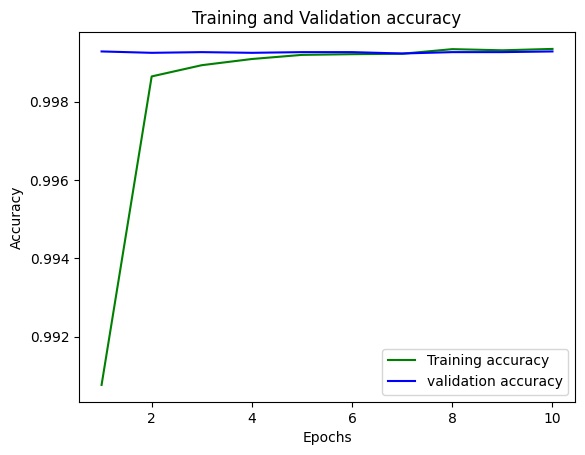

In [78]:
# Plot Training and validation accuracy
acc_train = history_first.history['accuracy']
acc_val = history_first.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The accuracy and loss of the model is calculated using the test set.
The model used for evaluation is the best model saved during the training session. To calculate the loss and accuracy, evaluate is used.

In [81]:
best_model = load_model('first_model.h5')

loss, accuracy = best_model.evaluate(X_test, y_test, verbose=2)
print('\nTesting loss: %.2f, accuracy: %.2f%%'%(loss, accuracy*100))

1781/1781 - 4s - loss: 0.0040 - accuracy: 0.9993 - 4s/epoch - 2ms/step

Testing loss: 0.00, accuracy: 99.93%


The confusion Matrix of the model is ploted to show how the model performed on each class

1781/1781 [==============================] - 4s 2ms/step


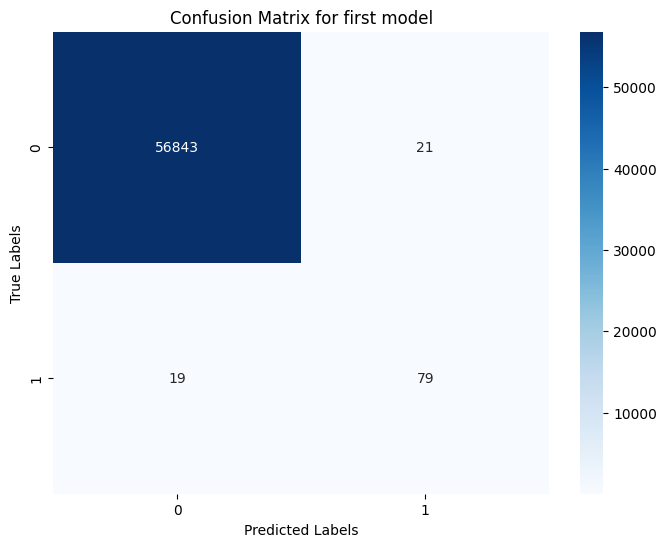

In [90]:
y_pred=best_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for first model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [91]:
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.81      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [92]:
# Instantiate ADASYN and fit_transform the training data
adasyn = ADASYN(random_state=42)

In [93]:
X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [94]:
X_resampled.shape

(568628, 30)

In [95]:
y_resampled.shape

(568628,)

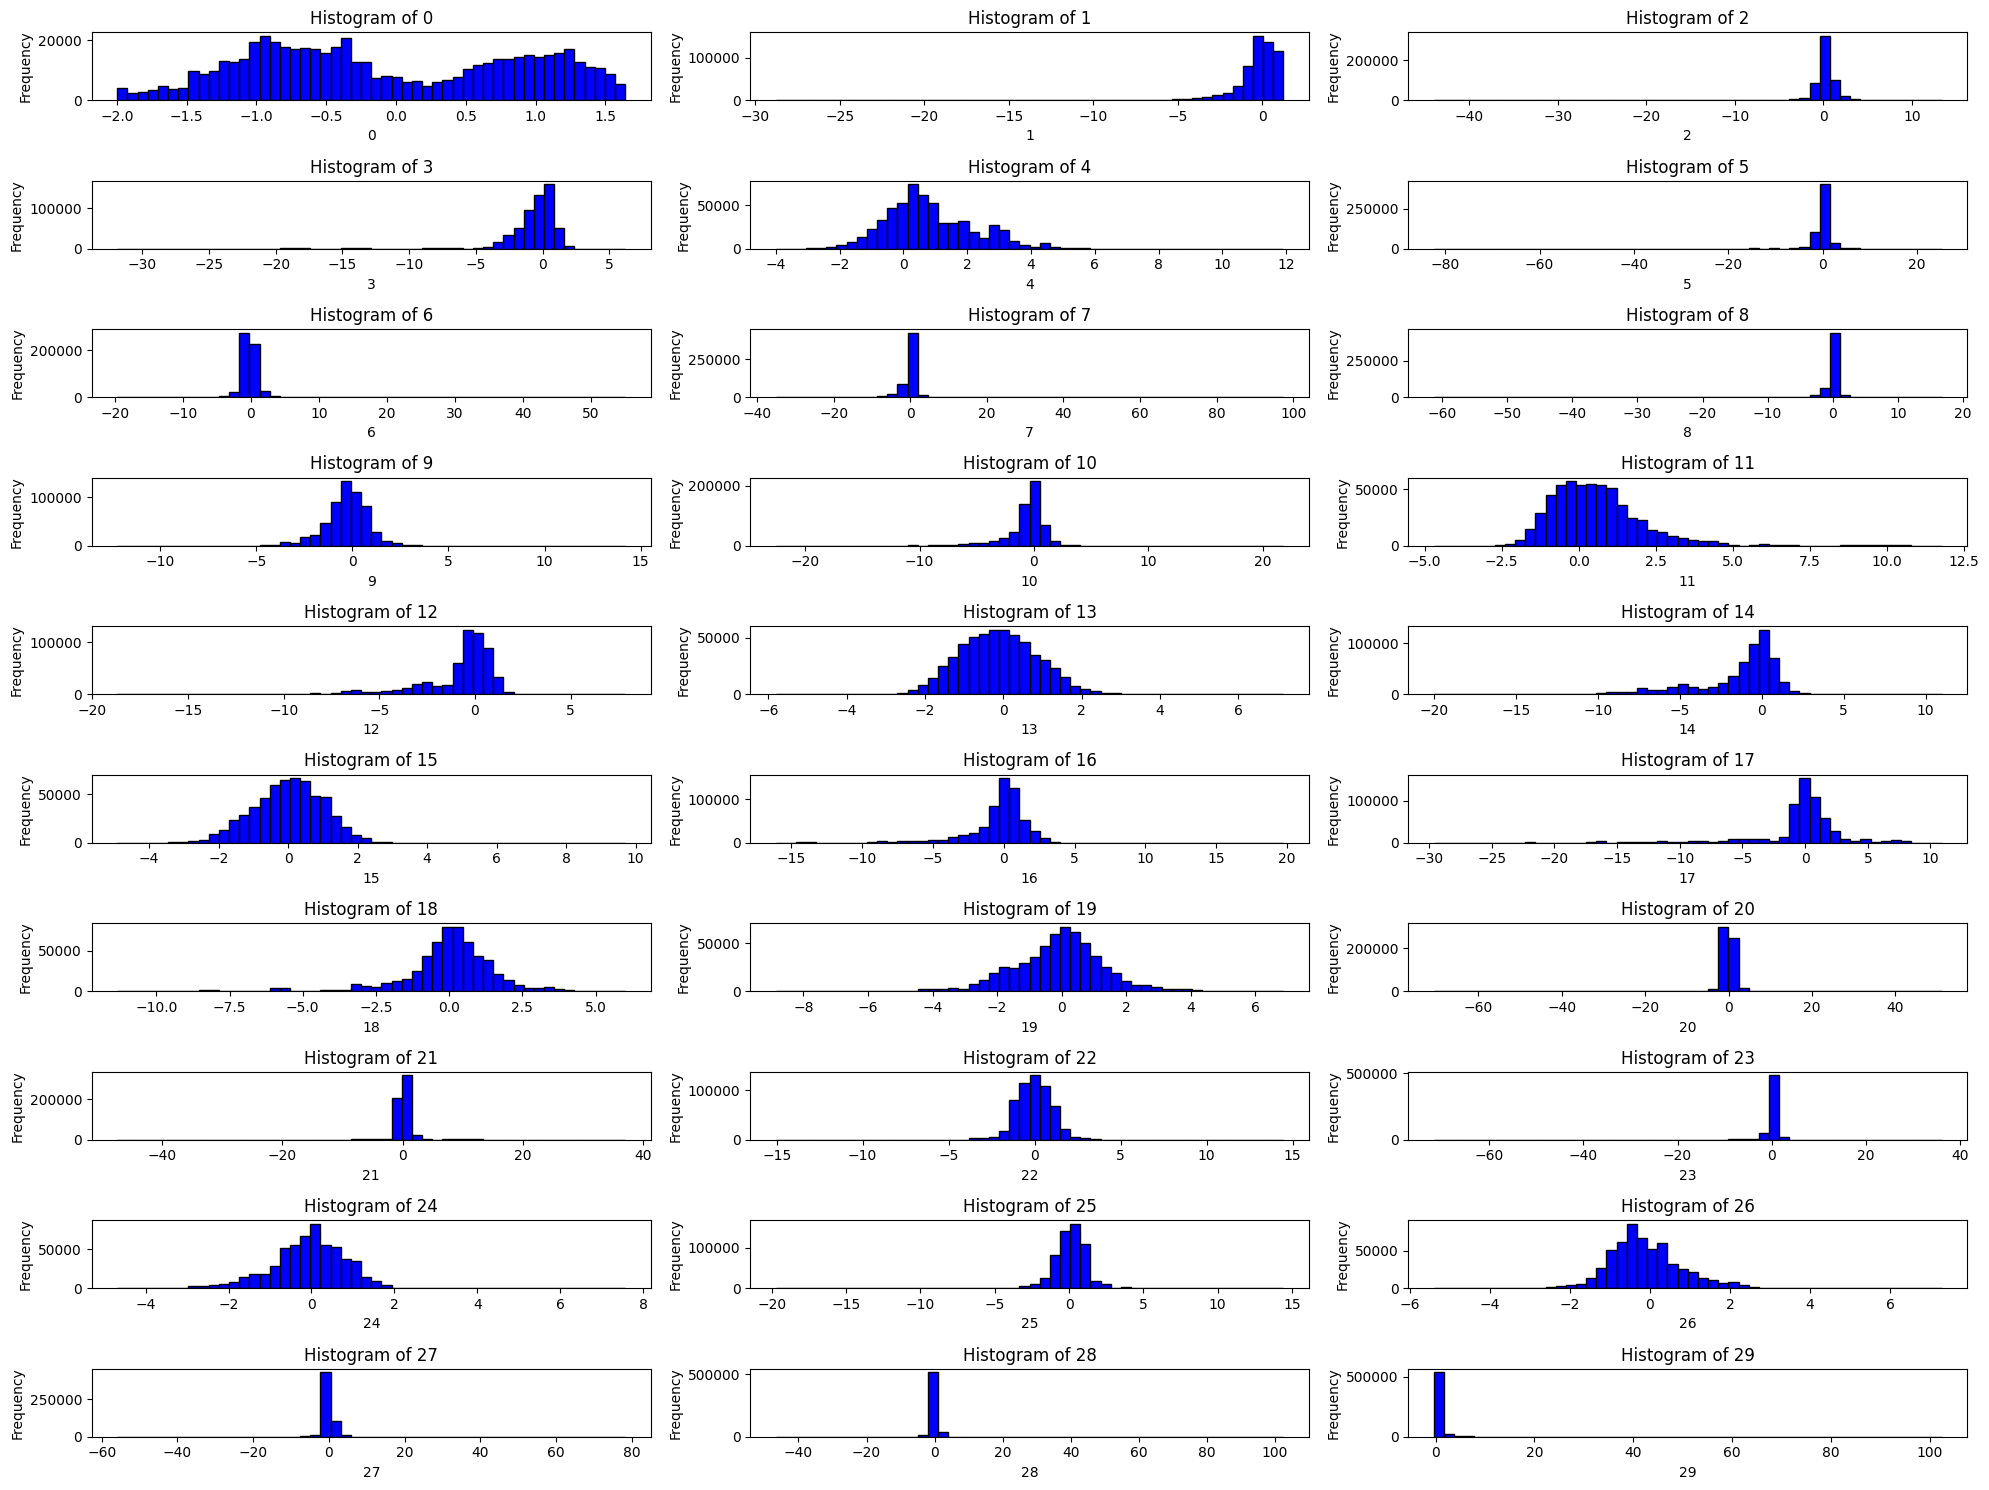

In [96]:
import matplotlib.pyplot as plt

df = pd.DataFrame(X_resampled)

# Columns to plot
columns_to_plot = df.columns[0:30]

# Plotting histograms for multiple columns
plt.figure(figsize=(20, 15))

for i, column_name in enumerate(columns_to_plot, 1):
    plt.subplot(10, 3, i)
    plt.hist(df[column_name], bins=50, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [97]:
classes = pd.DataFrame(y_resampled)

print('No Frauds', round(classes.value_counts()[0]/len(classes) * 100,2), '% of the dataset')
print('Frauds', round(classes.value_counts()[1]/len(classes) * 100,2), '% of the dataset')

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [113]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.5000022 0.4999978]
[0.5 0.5]


In [114]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [115]:
# See if both the train and val label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_val))

Label Distributions: 

[0.50000293 0.49999707]
[0.5 0.5]


In [116]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = np.array(X_val).reshape(X_val.shape[0], X_val.shape[1], 1)

In [103]:
y_train = keras.utils.to_categorical(y_train, 2)
y_val = keras.utils.to_categorical(y_val, 2)
y_test = keras.utils.to_categorical(y_test, 2)

print("Shapes:\nx_train:%s\ny_train:%s\n" % (X_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (X_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(341176, 30, 1)
y_train:(341176, 2)

x_test:(113726, 30, 1)
y_test:(113726, 2)

input_shape:(30, 1)



In [104]:
X_train.shape

(341176, 30, 1)

In [105]:
y_train.shape

(341176, 2)

In [106]:
checkpoint_second = ModelCheckpoint('second_model.h5', save_best_only=True, monitor='val_loss', mode='min')

In [107]:
history_second = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, callbacks=[checkpoint_second], verbose=1)

Epoch 1/10
10662/10662 [==============================] - 75s 7ms/step - loss: 0.2670 - accuracy: 0.8904 - val_loss: 0.1389 - val_accuracy: 0.9505
Epoch 2/10
   21/10662 [..............................] - ETA: 57s - loss: 0.1901 - accuracy: 0.9152

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10662/10662 [==============================] - 76s 7ms/step - loss: 0.1695 - accuracy: 0.9338 - val_loss: 0.0977 - val_accuracy: 0.9689
Epoch 3/10
10662/10662 [==============================] - 73s 7ms/step - loss: 0.1313 - accuracy: 0.9507 - val_loss: 0.0749 - val_accuracy: 0.9804
Epoch 4/10
10662/10662 [==============================] - 73s 7ms/step - loss: 0.1099 - accuracy: 0.9595 - val_loss: 0.0673 - val_accuracy: 0.9847
Epoch 5/10
10662/10662 [==============================] - 75s 7ms/step - loss: 0.0968 - accuracy: 0.9647 - val_loss: 0.0581 - val_accuracy: 0.9872
Epoch 6/10
10662/10662 [==============================] - 76s 7ms/step - loss: 0.0887 - accuracy: 0.9686 - val_loss: 0.0586 - val_accuracy: 0.9892
Epoch 7/10
10662/10662 [==============================] - 75s 7ms/step - loss: 0.0814 - accuracy: 0.9711 - val_loss: 0.0563 - val_accuracy: 0.9904
Epoch 8/10
10662/10662 [==============================] - 78s 7ms/step - loss: 0.0764 - accuracy: 0.9734 - val_loss: 0.0517 - val

We plot the training and validation loss of the model

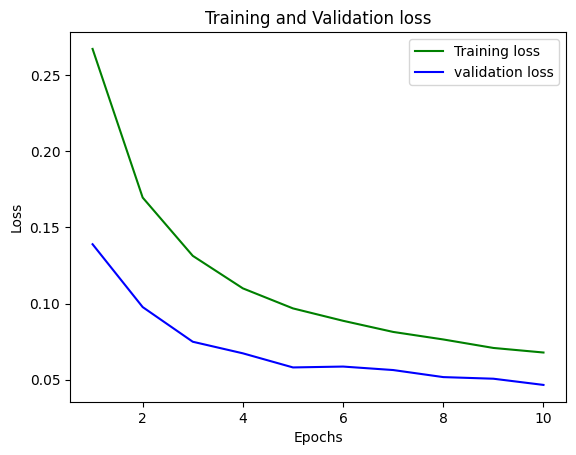

In [108]:
# Plot Training and validation loss
loss_train = history_second.history['loss']
loss_val = history_second.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We plot the training and validation accuracy of the model

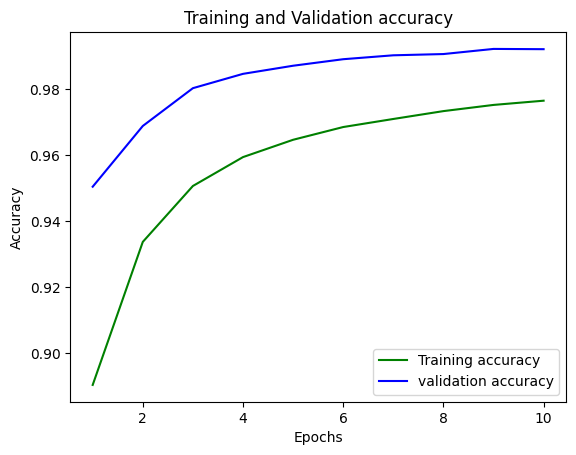

In [109]:
# Plot Training and validation accuracy
acc_train = history_second.history['accuracy']
acc_val = history_second.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The accuracy and loss of the model is calculated using the test set.
The model used for evaluation is the best model saved during the training session. To calculate the loss and accuracy, evaluate is used.

In [110]:
best_model = load_model('second_model.h5')

loss, accuracy = best_model.evaluate(X_test, y_test, verbose=2)
print('\nTesting loss: %.2f, accuracy: %.2f%%'%(loss, accuracy*100))

3554/3554 - 9s - loss: 0.0476 - accuracy: 0.9919 - 9s/epoch - 2ms/step

Testing loss: 0.05, accuracy: 99.19%


The confusion Matrix of the model is ploted to show how the model performed on each class

3554/3554 [==============================] - 6s 2ms/step


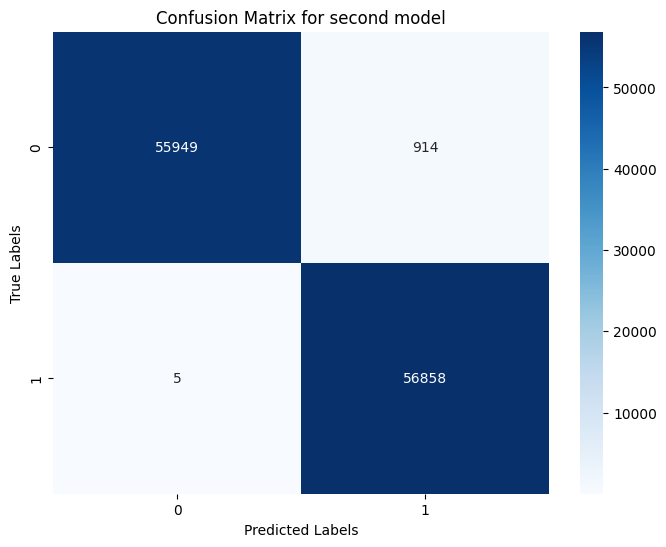

In [117]:
y_pred=best_model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for second model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [118]:
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.98      1.00      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

